In [1]:
from scipy.signal import argrelextrema
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(1000 + np.cumsum(0.1 + np.random.randint(-10, 10, 1000)), columns=['close'])

<AxesSubplot:>

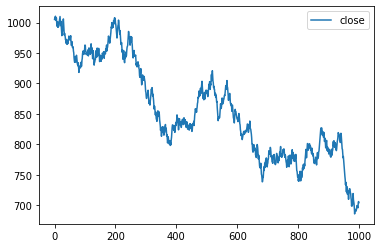

In [3]:
df.plot()

In [4]:
argrelextrema(df["close"].values, np.less, order=30)[0]

array([ 80, 130, 230, 380, 451, 537, 616, 682, 762, 802, 860, 907, 985])

<AxesSubplot:>

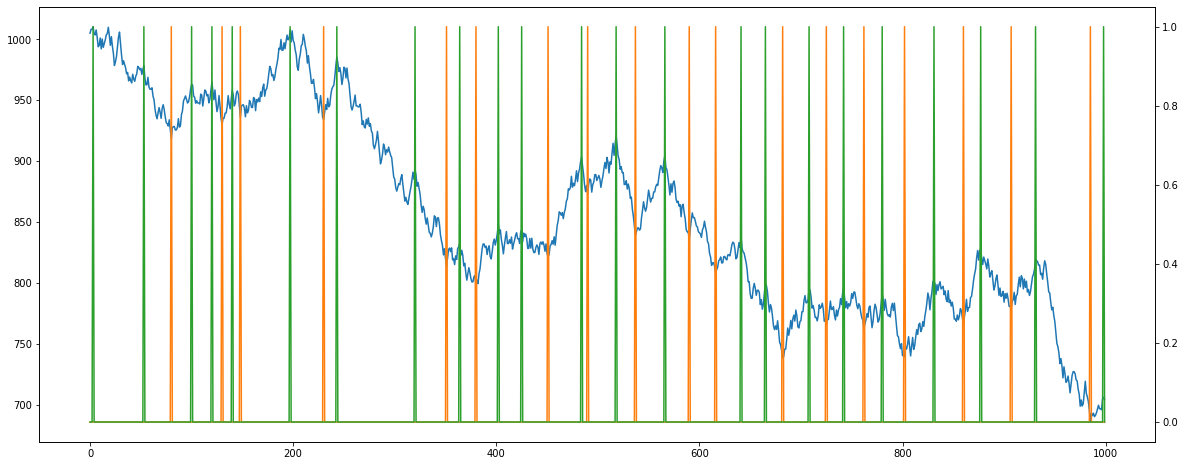

In [7]:
max_peaks = argrelextrema(df["close"].values, lambda a, b: a < b, order=15)[0]
min_peaks = argrelextrema(df["close"].values, lambda a, b: a > b, order=15)[0]

df["maxima"] = 0
df.loc[max_peaks, "maxima"] = 1

df["minima"] = 0
df.loc[min_peaks, "minima"] = 1

df["close"].plot(figsize=(20,8))
df["maxima"].plot(secondary_y=True)
df["minima"].plot(secondary_y=True)

In [101]:
df[df["minima"].isin([1, 2])]

,close,maxima,minima,missed-maxima,missed-minima,smeared-maxima,&target
1,1008.2,0,1,0,0,0,NaN
107,928.8,0,1,0,0,0,NaN
203,899.4,0,1,0,0,0,NaN
243,920.4,0,1,0,0,0,NaN
317,840.8,0,1,0,0,0,NaN
342,817.3,0,1,0,0,0,NaN
433,783.4,0,1,0,0,0,NaN
520,718.1,0,1,0,0,0,NaN
592,747.3,0,1,0,0,0,NaN
651,707.2,0,1,0,0,0,NaN


<AxesSubplot:>

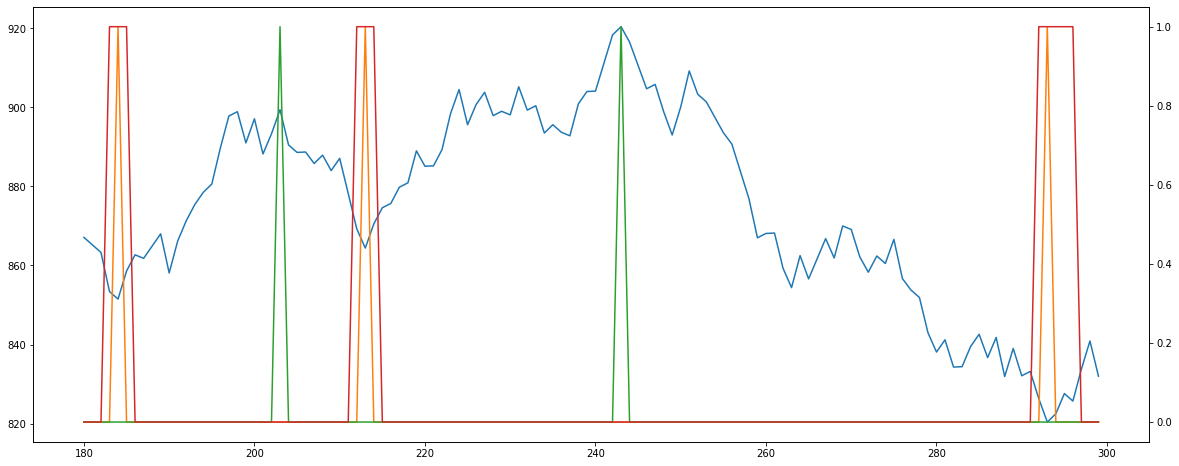

In [91]:
df[180:300]["close"].plot(figsize=(20,8))
df[180:300]["maxima"].plot(secondary_y=True)
df[180:300]["minima"].plot(secondary_y=True)
df[180:300]["smeared-maxima"].plot(secondary_y=True)

In [19]:
from scipy.signal import find_peaks

<AxesSubplot:>

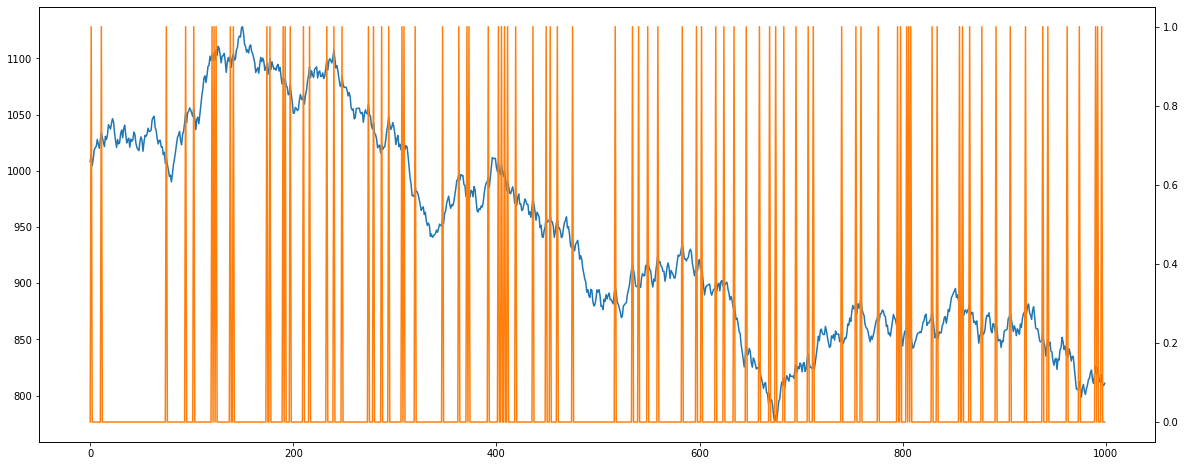

In [28]:
df = pd.DataFrame(1000 + np.cumsum(0.1 + np.random.randint(-10, 10, 1000)), columns=['close'])

peaks = find_peaks(df["close"].values, threshold=4)[0]

df["peak"] = 0
df.loc[peaks, "peak"] = 1

df["close"].plot(figsize=(20,8))
df["peak"].plot(secondary_y=True)

In [22]:
df

,close,maxima,minima,missed-maxima,missed-minima
0,999.1,0,0,0,0
1,1006.2,0,1,0,0
2,1000.3,0,0,0,1
3,998.4,0,0,0,0
4,993.5,0,0,0,0
...,...,...,...,...,...
995,337.6,0,0,0,0
996,342.7,0,0,0,0
997,351.8,0,0,0,0
998,356.9,0,1,0,0


In [332]:
# Define Min & Max binary indicators
min_peaks = argrelextrema(df["close"].values, np.less, order=20)
max_peaks = argrelextrema(df["close"].values, np.greater, order=20)

df["&s-minima"] = 0
df["&s-maxima"] = 0
df["real-minima"] = 0
df["real-maxima"] = 0

df["pct_ahead"] = df["close"].shift(-1) / df["close"]
df["pct_be"] = df["close"].shift(-1) / df["close"]

proximity_tolerance = 0.1

for mp in min_peaks[0]:
    df.at[mp, "real-minima"] = 1
    df.at[mp, "&s-minima"] = 1
    min_peak_value = df.at[mp, "close"]
    if abs(df.at[mp - 1, "close"] / min_peak_value - 1) < proximity_tolerance:
        df.at[mp - 1, "&s-minima"] = 1
    if abs(df.at[mp + 1, "close"] / min_peak_value - 1) < proximity_tolerance:
        df.at[mp + 1, "&s-minima"] = 1

for mp in max_peaks[0]:
    df.at[mp, "real-maxima"] = 1
    df.at[mp, "&s-maxima"] = 1
    max_peak_value = df.at[mp, "close"]
    if abs(df.at[mp - 1, "close"] / max_peak_value - 1) < proximity_tolerance:
        df.at[mp - 1, "&s-maxima"] = 1
    if abs(df.at[mp + 1, "close"] / max_peak_value - 1) < proximity_tolerance:
        df.at[mp + 1, "&s-maxima"] = 1

In [333]:
df.head(50)

,close,maxima,minima,&s-minima,&s-maxima,real-minima,real-maxima
0,-9.9,0,0,0,0,0,0
1,-0.8,0,0,0,0,0,0
2,-0.7,0,0,0,0,0,0
3,-7.6,0,0,0,0,0,0
4,-6.5,0,0,0,0,0,0
5,-13.4,0,0,0,0,0,0
6,-19.3,0,1,1,0,1,0
7,-10.2,0,0,0,0,0,0
8,-16.1,0,0,0,0,0,0
9,-8.0,0,0,0,0,0,0


In [99]:
from scipy.signal import find_peaks

In [199]:
df = yf.download("AAPL")["Close"][8000:].reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2012-08-28,24.100000
1,2012-08-29,24.052500
2,2012-08-30,23.709642
3,2012-08-31,23.758572
4,2012-09-04,24.106071
...,...,...
2501,2022-08-08,164.869995
2502,2022-08-09,164.919998
2503,2022-08-10,169.240005
2504,2022-08-11,168.490005


In [204]:
max_peaks, _ = find_peaks(df["Close"], prominence=2, wlen=400)
min_peaks, _ = find_peaks(-df["Close"], prominence=2, wlen=400)

<AxesSubplot:>

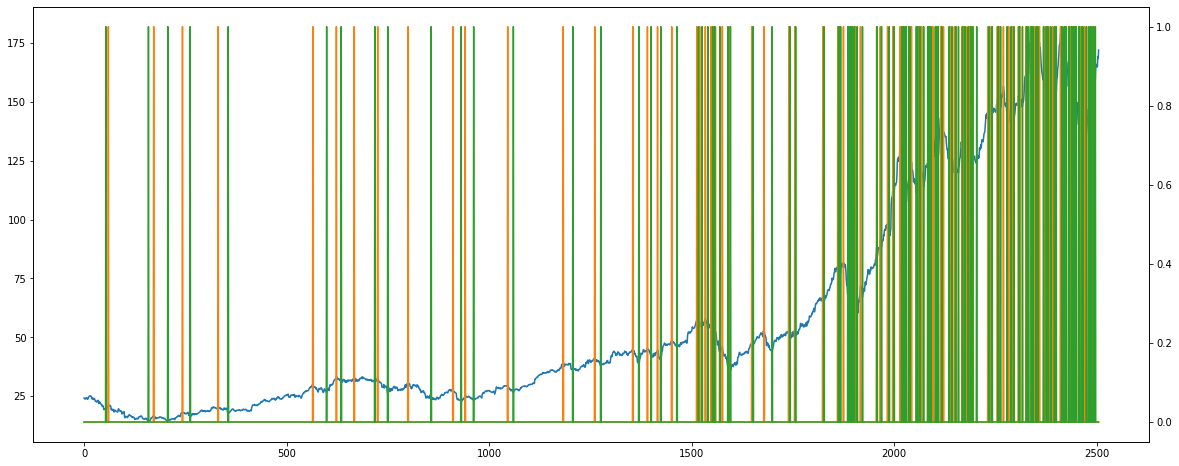

In [205]:
df["maxima"] = 0
df.loc[max_peaks, "maxima"] = 1

df["minima"] = 0
df.loc[min_peaks, "minima"] = 1

df["Close"].plot(figsize=(20,8))
df["maxima"].plot(secondary_y=True)
df["minima"].plot(secondary_y=True)

In [152]:
df["max_peak"] = 0
df.loc[peak_idx, "max_peak"] = df.loc[peak_idx, "close"]

<AxesSubplot:>

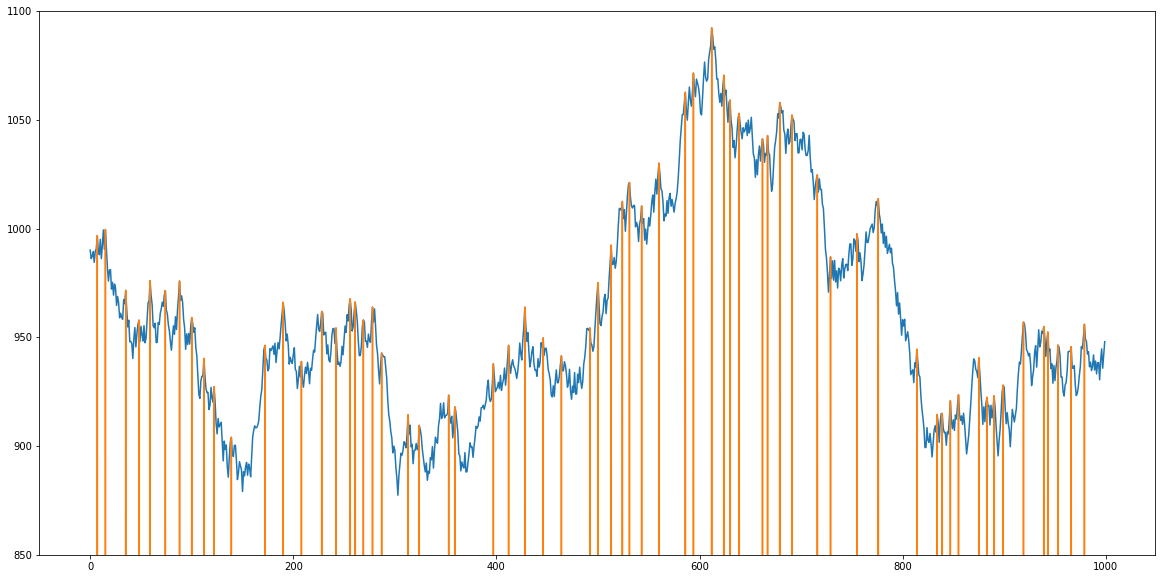

In [153]:
df["close"].plot(figsize=(20,10), ylim=(850, 1100))
df["max_peak"].plot()

In [177]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100040,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600
...,...,...,...,...,...,...
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.869995,60276900
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.919998,63135500
2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500
